In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

import layers as layers
import util as util
import networks as networks

In [195]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

## Basic testing

#### Layer

In [196]:
x = torch.empty((5,1)).normal_(0,1)
y = torch.randn(5,1)

rff layer

In [197]:
l = layers.RffHsLayer(1,6)

In [206]:
l.forward(x, sample=True)

tensor([[ 0.5772,  0.5540,  0.5544,  0.5754,  0.4932,  0.2477],
        [ 0.5706,  0.5726,  0.5590,  0.5373,  0.5114,  0.3180],
        [ 0.1333,  0.1662,  0.5773, -0.5722,  0.5751,  0.5569],
        [ 0.5465,  0.5755,  0.5642,  0.4166,  0.5322,  0.4015],
        [ 0.5503,  0.4507,  0.5411,  0.4603,  0.4397,  0.0553]])

In [198]:
l.entropy()

tensor(-87.5348, grad_fn=<AddBackward0>)

In [199]:
l.cross_entropy()

tensor(162.8707, grad_fn=<AddBackward0>)

In [200]:
l.kl_divergence()

tensor(250.4054, grad_fn=<SubBackward0>)

In [201]:
l.fixed_point_updates()

Linear layer

In [151]:

h = torch.randn(5,3)
l = layers.LinearLayer(3)

In [152]:
l.fixed_point_updates(h,y)

In [153]:
l.forward(h, True)

tensor([[-0.1163],
        [-0.0508],
        [-0.1255],
        [ 1.0155],
        [-0.9472]])

In [154]:
l.init_parameters()

## Simple model

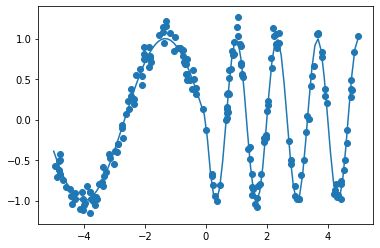

In [408]:
# Toy data
x_true = torch.tensor(np.linspace(-5,5,100).reshape(-1,1), dtype=torch.float)
x, x_val, y, y_val, y_scale, y_true = util.gen_toy_data(num_train=200, x_true=x_true)

plt.scatter(x.numpy(), y.numpy())
plt.plot(x_true.numpy(), y_true.numpy())

In [412]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

In [413]:
model = networks.RffHs(x.shape[1],y.shape[1], dim_hidden=200, sig2_inv=1/.1)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [414]:
model.reinit_parameters(x,y,n_reinit=10)

In [415]:
elbo = -networks.train(model, optimizer, x, y, n_epochs=1, print_freq=1000)


In [351]:
#plt.plot(elbo.numpy())

In [381]:
def plot_varbnn(bnn, n_samp, x_true):
    #bnn = networks.RffHs(x.shape[1],y.shape[1], dim_hidden=100, sig2_inv=1/.1)
    y_samps=np.array([bnn(x_true, sample=True).view(-1).detach().numpy() for _ in range(n_samp)])
    sns.tsplot(y_samps, time=x_true.numpy(),ci='sd',color='red')
    plt.scatter(x.numpy(),y.numpy(), color='k', alpha=.5)
    plt.plot(x_true.numpy(),y_true.numpy(), color='k')
    plt.legend(['Truth','BNN'])

    plt.xlabel('x')
    plt.ylabel('y')  
    
    
plot_varbnn(model, 100, x_true)



RuntimeError: cholesky_cpu: U(85,85) is zero, singular U.

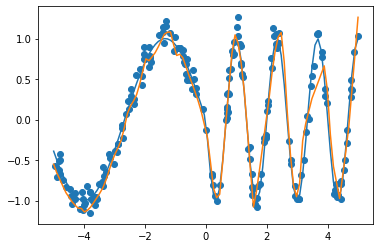

In [416]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x_true.numpy(), y_true.numpy())
plt.plot(x_true.numpy(), model.forward(x_true, sample=False).detach().numpy())

In [241]:
for name, param in model.named_parameters():
    print(name, param.data)

layer_in.lognu_mu tensor([-3.2843])
layer_in.lognu_logsig2 tensor([-9.0196])
layer_in.logeta_mu tensor([-2.8806, -2.5622, -1.1230, -5.2147, -1.6749, -2.4959, -2.1409, -2.0977,
        -2.4344, -2.2622, -1.1728, -2.4860, -7.2789, -3.3983, -3.0443, -2.1481,
        -4.5675, -0.8988,  0.6402, -1.9453,  0.3479, -2.4036, -1.5921, -1.3321,
        -4.0842, -2.9167, -3.0227, -3.8060, -2.3711, -2.1440, -1.5033, -0.7538,
        -2.4705, -1.3816, -2.8476, -3.0089, -1.7845, -1.3732, -2.9796, -0.9387,
        -2.5895, -2.0773, -1.3593, -5.6289, -0.6216, -1.5813, -3.1768, -1.8976,
        -1.5697, -0.6090,  0.1575, -1.2094, -3.3152, -3.7155, -2.5268, -2.1353,
        -2.8509, -2.0690, -1.5794, -1.7594, -2.5039, -1.4314, -3.5786, -1.6298,
        -2.2987, -2.3906, -1.7098, -2.7475, -3.7468, -1.1912, -2.9848, -2.1111,
        -1.6484, -2.1595, -2.6261, -4.0142, -0.6266, -3.5723, -3.9156, -0.3017,
        -7.4117, -1.3329, -1.8659, -3.9640,  2.1289, -2.6164, -2.1809, -0.7022,
        -2.9029,  1.1924